# COMP20230 Tutorial/Lab: Graphs

## Graphs in Python

Included in the anaconda distribution is a package called `networkx` that allows you to create graphs and provides impelemntations of `dfs`, `bfs`, `dijkstra` etc. It even provides implementations to plot and visualise your graphs. Be warned the documentation and examples can be tricky to follow.

To begin with, we will use the `networkx` package (https://networkx.github.io/documentation/) to create a graph, $G$, and add vertices (nodes) $a$ through $j$ with edges corresponding to the example in the lecture slides.

In [8]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
G = nx.Graph()
G.add_node('a')
G.add_node('b')
G.add_node('c')
G.add_node('d')
G.add_node('e')
G.add_node('f')
G.add_node('g')
G.add_node('h')
G.add_node('i')
G.add_node('j')

G.add_edge('a', 'b')
G.add_edge('a', 'c')
G.add_edge('a', 'd')
G.add_edge('a', 'e')
G.add_edge('a', 'j')
G.add_edge('b', 'e')
G.add_edge('b', 'f')
G.add_edge('c', 'd')
G.add_edge('d', 'j')
G.add_edge('e', 'f')
G.add_edge('e', 'h')
G.add_edge('f', 'g')
G.add_edge('g', 'i')
G.add_edge('h', 'i')
G.add_edge('i', 'j')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 15
Average degree:   3.0000


Now, we will use the networkx plotting functionality (that uses `matplotlib` under the covers) to plot the graph. The layout could be visualised in any way as the origin and the lengths of the edges are arbitrary.

There is a method `nx.spring_layout(G)` which will compute a random layout for you. I have specified the x and y co-ordinates in a dictionary so that the layout is close to that in in the slides.

The rest of the code below just sets the parameters for colours, size, font etc.

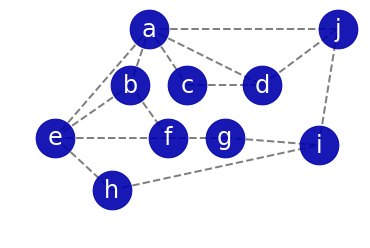

In [18]:
# pos = nx.spring_layout(G) # for a random layout
pos= {'a': [-.2, .7], 'b': [-.3,  -.8], 'c': [0,-.8], 'd': [0.4, -0.8], 'e': [-.7, -2.2], 'f': [-.1, -2.2], 'g': [.2,-2.2], 'h': [ -.4, -3.6], 'i': [ .7, -2.4], 'j': [.8, .7]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

## Depth First Search (DFS) and Breadth First Search (BFS)

`networkx` will compute a `dfs` or `bfs` for a given start vertex and returns the the search route as tuple pairs.

It will also compute Dijkstra and a shortest path between two vertices. Check the documentation for how to do this.

In [10]:
print(list(nx.dfs_edges(G, 'c')))

[('c', 'a'), ('a', 'b'), ('b', 'e'), ('e', 'f'), ('f', 'g'), ('g', 'i'), ('i', 'h'), ('i', 'j'), ('j', 'd')]


In [11]:
print(list(nx.bfs_edges(G, 'c')))

[('c', 'a'), ('c', 'd'), ('a', 'b'), ('a', 'e'), ('a', 'j'), ('b', 'f'), ('e', 'h'), ('j', 'i'), ('f', 'g')]


## Implementing a Graph algorithm

The code below to implements a Graph ADT for an undirected, unweighted graph in Python. It is a simple implementation without error checking.

In addition, to the graph structure, it also keeps a list that tells you for each index in the graph what is the content of the node (i.e. allow us to, for instance, assign a number value to each vertex similar to the example graphs in the lecture).

We implement three key operations:

* `add_vertex(G, x)`
* `add_edge(G, x, y)`
* `neighbours(G, x)`

There is also a method to allow us to print the graph: `print_str(self)`

In [12]:
class Graph:
    
    def __init__(self):
        self.__my_adjacency_list = []
        self.__vertex_content = []

    def add_vertex(self, x):
        self.__my_adjacency_list.append([])
        self.__vertex_content.append(x)
        
    def add_edge(self, x, y):
        if y not in self.__my_adjacency_list[x]:
            self.__my_adjacency_list[x].append(y)
            self.__my_adjacency_list[y].append(x)
        
    def neighbours(self, x):
        return self.__my_adjacency_list[x]
        
    def print_str(self):
        for i in range(0, len(self.__my_adjacency_list)):
            print("node ", i, "(" , self.__vertex_content[i] , ") = ", self.__my_adjacency_list[i])
        

## Questions/Exercises

1. Implement a graph with nodes labelled $3,100,50$ with edges between 3 and 100 and 100 and 50 and print out the results.
2. The code uses an adjacency list. Consider how you might use a matrix instead. What change would you make to the constructor?


# Solution

In [13]:
g = Graph()
g.add_vertex(3)
g.add_vertex(100)
g.add_vertex(50)
g.add_edge(0, 1)
g.add_edge(1, 2)

g.print_str()
print("neighbours of 1 = ", g.neighbours(1))

# for a matrix, the constructor would need:
#     def __init__(self):
#         self.__my_matrix = [[]]
#         self.__vertex_content = []

node  0 ( 3 ) =  [1]
node  1 ( 100 ) =  [0, 2]
node  2 ( 50 ) =  [1]
neighbours of 1 =  [0, 2]


## Weighted Graph

The example below shows a weighted, undirected graph. It makes use of a `defaultdict`. This is a special kind of dictionary. Look it up in the python documentation.

In [14]:
import collections
import math
 
class Graph:
    def __init__(self):
        self.vertices = set()
        # makes the default value for all vertices an empty list
        self.edges = collections.defaultdict(list)
        self.weights = {}
 
    def add_vertex(self, value):
        self.vertices.add(value)
 
    def add_edge(self, from_vertex, to_vertex, distance):
        if from_vertex == to_vertex: pass  # no cycles allowed
        self.edges[from_vertex].append(to_vertex)
        self.edges[to_vertex].append(from_vertex) 
        self.weights[(from_vertex, to_vertex)] = distance
        self.weights[(to_vertex, from_vertex)] = distance 
 
    def __str__(self):
        string = "Vertices: " + str(self.vertices) + "\n"
        string += "Edges: " + str(self.edges) + "\n"
        string += "Weights: " + str(self.weights)
        return string

## Questions/Exercises

3. How would you adapt the code to make this a directed weighted graph?

# Solution

In [15]:
import collections
import math
 
class Graph:
    def __init__(self):
        self.vertices = set()
        # makes the default value for all vertices an empty list
        self.edges = collections.defaultdict(list)
        self.weights = {}
 
    def add_vertex(self, value):
        self.vertices.add(value)
 
    def add_edge(self, from_vertex, to_vertex, distance):
        if from_vertex == to_vertex: pass  # no cycles allowed
        self.edges[from_vertex].append(to_vertex)
        #self.edges[to_vertex].append(from_vertex) # just comment out to change from undirected graph to directed
        self.weights[(from_vertex, to_vertex)] = distance
        #self.weights[(to_vertex, from_vertex)] = distance # just comment out to change from undirected graph to directed
 
    def __str__(self):
        string = "Vertices: " + str(self.vertices) + "\n"
        string += "Edges: " + str(self.edges) + "\n"
        string += "Weights: " + str(self.weights)
        return string

## Finding the Shortest Path via Dijkstra

Implement Dijkstra's algorithm to find the shortest path in a graph. Run for starting at node $C$ and node $H$.

The sample code contains functions for `dijkstra(graph, start)` and `shortest_path(graph, start, end)`. 


In [16]:

def dijkstra(graph, start):
    # initializations
    S = set()

    # delta represents the length shortest distance paths from start -> v, for v in delta.
    # We initialize it so that every vertex has a path of infinity (this line will break if you run python 2)
    delta = dict.fromkeys(list(graph.vertices), math.inf)
    previous = dict.fromkeys(list(graph.vertices), None)

    # then we set the path length of the start vertex to 0
    delta[start] = 0

    # while there exists a vertex v not in S
    while S != graph.vertices:
        # let v be the closest vertex that has not been visited...it will begin at 'start'
        v = min((set(delta.keys()) - S), key=delta.get)

        # for each neighbor of v not in S
        for neighbor in set(graph.edges[v]) - S:
            new_path = delta[v] + graph.weights[v,neighbor]

            # is the new path from neighbor through
            if new_path < delta[neighbor]:
                # since it's optimal, update the shortest path for neighbor
                delta[neighbor] = new_path

                # set the previous vertex of neighbor to v
                previous[neighbor] = v
        S.add(v)

    return (delta, previous)
 
 
 
def shortest_path(graph, start, end):
    '''Uses dijkstra function in order to output the shortest path from start to end
    '''
    delta, previous = dijkstra(graph, start)

    path = []
    vertex = end

    while vertex is not None:
        path.append(vertex)
        vertex = previous[vertex]

    path.reverse()
    return path


In [17]:
g = Graph()
vertices = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
for v in vertices:
    g.add_vertex(v)

# vertex a adjacency list
g.add_edge('a', 'b', 4)
g.add_edge('a', 'c', 6)
g.add_edge('a', 'd', 7)
g.add_edge('a', 'e', 5)
g.add_edge('a', 'j', 1)
# vertex b adjacency list
g.add_edge('b', 'e', 9)
g.add_edge('b', 'f', 8)

g.add_edge('c', 'd', 2)

g.add_edge('d', 'j', 3)

g.add_edge('e', 'f', 4)
g.add_edge('e', 'h', 3)

g.add_edge('f', 'g', 7)

g.add_edge('g', 'i', 15)

g.add_edge('h', 'i', 12)
g.add_edge('i', 'j', 9)
print("graph: ", g)
print(dijkstra(g, 'c'))

print(shortest_path(g, 'c', 'g'))

graph:  Vertices: {'a', 'e', 'f', 'b', 'c', 'g', 'h', 'i', 'd', 'j'}
Edges: defaultdict(<class 'list'>, {'a': ['b', 'c', 'd', 'e', 'j'], 'b': ['e', 'f'], 'c': ['d'], 'd': ['j'], 'e': ['f', 'h'], 'f': ['g'], 'g': ['i'], 'h': ['i'], 'i': ['j']})
Weights: {('a', 'b'): 4, ('a', 'c'): 6, ('a', 'd'): 7, ('a', 'e'): 5, ('a', 'j'): 1, ('b', 'e'): 9, ('b', 'f'): 8, ('c', 'd'): 2, ('d', 'j'): 3, ('e', 'f'): 4, ('e', 'h'): 3, ('f', 'g'): 7, ('g', 'i'): 15, ('h', 'i'): 12, ('i', 'j'): 9}
({'a': inf, 'e': inf, 'f': inf, 'b': inf, 'c': 0, 'g': inf, 'h': inf, 'i': inf, 'd': 2, 'j': 5}, {'a': None, 'e': None, 'f': None, 'b': None, 'c': None, 'g': None, 'h': None, 'i': None, 'd': 'c', 'j': 'd'})
['g']
